In [2]:
!git clone https://github.com/IrohScripts/INF8770_A22_TP1.git
%cd INF8770_A22_TP1/

/
Cloning into 'INF8770_A22_TP1'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.
/INF8770_A22_TP1


In [3]:
from datetime import datetime, timedelta
from decimal import *
from collections import Counter
import sys
import numpy as np
import matplotlib.pyplot as py
import random

In [4]:
def imageToGray(rgb):
    return np.dot(rgb[:,:], [0.299, 0.587, 0.114])

In [5]:
def getImage(imageName):
  imagelue = py.imread(imageName)
  image=imagelue.astype('float')
  image=imageToGray(image)
  imageout=image.astype('uint8')
  return image

In [6]:
def showImage(imageName):
  fig1 = py.figure(figsize = (5,5))
  imagelue = py.imread(imageName)
  image=imagelue.astype('float')
  image=imageToGray(image)
  imageout=image.astype('uint8')
  py.imshow(imageout,cmap = py.get_cmap('gray'))
  py.show()
  return

In [7]:
def arythmethic_image(imageName):
  image = getImage(imageName)

  Message = []
  for i in range(0,len(image)):
    Message = np.concatenate((Message, image[i]))

  counter = Counter(Message)
  SymbACoder = len(Message)
  ProbSymb =[[Message[0], counter.get(Message[0])/len(Message)]]
  nbsymboles = 1

  # Table Symboles
  for i in range(1,len(Message)):
    if not list(filter(lambda x: x[0] == Message[i], ProbSymb)):
      ProbSymb += [[Message[i], counter.get(Message[i])/len(Message)]]
      nbsymboles += 1

  ProbSymb.sort(key = myFunc)

  for i in range(1,len(ProbSymb)):
    ProbSymb[i][1] = ProbSymb[i-1][1]+ProbSymb[i][1]

  longueurOriginale = np.ceil(np.log2(nbsymboles))*SymbACoder 

  # Codage
  Code = ProbSymb[:]
  Code = [['', 0]] + ProbSymb[:]

  valfinale = 0
  for i in range(SymbACoder): 
      #Cherche dans quel intervalle est le symbole à coder
      temp = list(filter(lambda x: x[0] == Message[i], Code))
      indice = Code.index(temp[0])

      #Calcul des bornes pour coder le caractère
      Debut = Code[indice-1][1]
      Plage = Code[indice][1] - Debut

      #Nouveaux intervalles pour coder le prochain symbole
      Code = [['', Debut]]  
      for j in range(len(ProbSymb)):
          Code += [[ProbSymb[j][0], Debut+ProbSymb[j][1]*Plage]]
      
      # Moyenne des extremité de la dernière intervalle pour la valeur finale
      valfinale = (Debut + Code[-1][1]) / 2

  # Obtenir valeur finale
  binaire = float_dec2bin(valfinale) #Essayer d'autres valeurs qui tombent dans l'intervalle
  print("Binaire: ", str(binaire))

  # Comparaison de longueur init et final
  # longueur = len("".join(valEnBits))
  # print("Longueur = {0}".format(longueur))
  # print("Longueur originale = {0}".format(longueurOriginale))

  return binaire

In [8]:
def predictive_image(imageName):
  image = getImage(imageName)

  # Duplication des premieres rangés et colonnes
  col=image[:,0]
  image = np.column_stack((col,image))
  col=image[:,len(image[0])-1]
  image = np.column_stack((col,image))
  row=image[0,:]
  image = np.row_stack((row,image))
  row=image[len(image)-1,:]
  image = np.row_stack((row,image))

  # Mat de prediction
  matpred = [[0.33,0.33],[0.33,0.0]]

  # Predictions
  imagepred = np.zeros((len(image)-2,len(image[0])-2))
  for i in range(1,len(image)-2):
      for j in range(1,len(image[0])-2):
          imagepred[i][j]=image[i-1][j-1]*matpred[0][0]+image[i-1][j]*matpred[0][1]+image[i][j-1]*matpred[1][0]

  # Afficher 
  # fig2 = py.figure(figsize = (10,10))
  # imageout=imagepred.astype('uint8')
  # py.imshow(imageout, cmap = py.get_cmap('gray'))
  # py.show()

  return imagepred

In [9]:
def generateString(characters, length_string_wanted):
  # String generator
  random_string = ""
  nb_char = len(characters)

  if nb_char > 0 :
    for char in range(length_string_wanted) :
      char_id = random.randrange(nb_char)
      random_string += characters[char_id]

  return random_string

In [10]:
def myFunc(e):
  return 1 - e[1] 

In [11]:
#Table hex vers binaire
hex2bin = dict('{:x} {:04b}'.format(x,x).split() for x in range(16))

def float_dec2bin(d):
    
    #Note: je ne suis pas sûr que cela fonctionne toujours... J'ai fait un nombre de tests limité.
    
    hx = float(d).hex() #Conversion float vers hex
    p = hx.index('p')
    #Conversion hex vers bin avec la table
    bn = ''.join(hex2bin.get(char, char) for char in hx[2:p])
    code = list(bn)
    indice = code.index('.') # position du séparateur des décimales
    puissance = int(hx[p+2:]) # Décalage
    if puissance >= indice:
        #On ajoute des zéros pour pouvoir décaler le séparateur des décimales.
        zerosdeplus = "0" * (puissance-indice+1)
        bn = zerosdeplus + bn
        code = list(bn)
        indice = code.index('.') # nouvelle position du séparateur des décimales

    # print(''.join(code))    
    
    #Décalage du séparateur décimal selon la puissance    
    for i in range(0,puissance):
        temp = code[indice-i-1];
        code[indice-i-1] = code[indice-i]
        code[indice-i] = temp
     
    # print(''.join(code))
    
    # Enlève les zéros de trop et la partie avant le séparateur décimal
    
    ind = code.index('.')+1
    code = code[ind:]
    ind= code[::-1].index('1')
    code = code[:(len(code)-ind)]   
    codebinaire = ''.join(code)

    return codebinaire

In [12]:
def arythmethic_text(Message):
  SymbACoder = len(Message)

  ProbSymb =[[Message[0], Message.count(Message[0])/len(Message)]]
  nbsymboles = 1

  # Table Symboles
  for i in range(1,len(Message)):
    if not list(filter(lambda x: x[0] == Message[i], ProbSymb)):
      ProbSymb += [[Message[i], Message.count(Message[i])/len(Message)]]
      nbsymboles += 1

  ProbSymb.sort(key = myFunc)

  for i in range(1,len(ProbSymb)):
    ProbSymb[i][1] = ProbSymb[i-1][1]+ProbSymb[i][1]

  longueurOriginale = np.ceil(np.log2(nbsymboles))*SymbACoder 

  # Codage
  Code = ProbSymb[:]
  Code = [['', 0]] + ProbSymb[:]

  valfinale = 0
  for i in range(SymbACoder): 
      #Cherche dans quel intervalle est le symbole à coder
      temp = list(filter(lambda x: x[0] == Message[i], Code))
      indice = Code.index(temp[0])

      #Calcul des bornes pour coder le caractère
      Debut = Code[indice-1][1]
      Plage = Code[indice][1] - Debut

      #Nouveaux intervalles pour coder le prochain symbole
      Code = [['', Debut]]  
      for j in range(len(ProbSymb)):
          Code += [[ProbSymb[j][0], Debut+ProbSymb[j][1]*Plage]]
      
      # Moyenne des extremité de la dernière intervalle pour la valeur finale
      valfinale = (Debut + Code[-1][1]) / 2

  # Obtenir valeur finale
  # print("Valeur finale: ", str(valfinale))
  binaire = float_dec2bin(valfinale) #Essayer d'autres valeurs qui tombent dans l'intervalle
  print("Binaire: ", str(binaire))

  # Comparaison de longueur init et final
  # longueur = len("".join(valEnBits))
  # print("Longueur = {0}".format(longueur))
  # print("Longueur originale = {0}".format(longueurOriginale))

  return binaire

In [13]:
def predictive_text(Message):
  charValues = np.empty(len(Message) + 1, dtype=int)
  charValues[0] = ord(Message[0]) # duplicating first value
  for i in range(1, len(charValues)):
    charValues[i] = ord(Message[i-1])

  predResult = np.empty(len(Message), dtype=int)
  for i in range(1, len(charValues)):
    predResult[i-1] = charValues[i] - charValues[i-1]
  
  # print(predResult)
  return predResult

In [14]:
def hypothèse1_image():
  # Image 100x100 avec beaucoup de pixels de couleurs identiques
  image = "smile.jpg"
  print("Image: ")
  showImage(image)

  # ----------------------
  startTime = datetime.now()
  arythmethic_image(image)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Arythmethic image delta time: ", str(deltaTime))

  # ----------------------
  startTime = datetime.now()
  predictive_image(image)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Predictive image delta time: ", str(deltaTime))

  return

In [15]:
def hypothèse1_text():
  # 5 letters and length 500
  characters = ['A','B','C','D','E']
  length_string_wanted = 500
  Message = generateString(characters, length_string_wanted)
  print("Length of message: ", str(length_string_wanted))
  print("Number of different characters: ", str(len(characters)))

  # ----------------------
  startTime = datetime.now()
  arythmethic_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Arythmethic text delta time: " , str(deltaTime))

  # ----------------------
  startTime = datetime.now()
  predictive_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Predictive text delta time: ", str(deltaTime))

  # 26 letters and length 500
  characters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
  length_string_wanted = 500
  Message = generateString(characters, length_string_wanted)
  print("Length of message: ", str(length_string_wanted))
  print("Number of different characters: ", str(len(characters)))

  # ----------------------
  startTime = datetime.now()
  arythmethic_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Arythmethic text delta time: " , str(deltaTime))

  # ----------------------
  startTime = datetime.now()
  predictive_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Predictive text delta time: ", str(deltaTime))

  # 5 letters and length 5000
  characters = ['A','B','C','D','E']
  length_string_wanted = 5000
  Message = generateString(characters, length_string_wanted)
  print("Length of message: ", str(length_string_wanted))
  print("Number of different characters: ", str(len(characters)))

  # ----------------------
  startTime = datetime.now()
  arythmethic_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Arythmethic text delta time: " , str(deltaTime))

  # ----------------------
  startTime = datetime.now()
  predictive_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Predictive text delta time: ", str(deltaTime))

  # 26 letters and length 5000
  characters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
  length_string_wanted = 5000
  Message = generateString(characters, length_string_wanted)
  print("Length of message: ", str(length_string_wanted))
  print("Number of different characters: ", str(len(characters)))

  # ----------------------
  startTime = datetime.now()
  arythmethic_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Arythmethic text delta time: " , str(deltaTime))

  # ----------------------
  startTime = datetime.now()
  predictive_text(Message)
  endTime =  datetime.now()
  deltaTime = endTime - startTime
  print("Predictive text delta time: ", str(deltaTime))

  return

In [16]:
def hypothèse2_image():
  # Image 100x100 avec beaucoup de pixels de couleurs identiques
  image = "blackSquare.jpg"
  print("Image: ")
  showImage(image)

  # ----------------------
  codedMessage = arythmethic_image(image)
  print("Arith")
  print("Number of characters of encoding: ", len(str(codedMessage)))

  # ----------------------
  codedMessage = predictive_image(image)
  print("Predictive")
  print("Number of characters of encoding: ", len(codedMessage)*len(codedMessage[0]))

  return

In [17]:
def hypothèse2_text():
  # Getting string msg
  characters = ['A','B']
  length_string_wanted = 5000
  Message = generateString(characters, length_string_wanted)
  print("Number of different characters: ", len(characters))
  print("Length of initial msg: ", length_string_wanted)

  # ----------------------
  codedMessage = arythmethic_text(Message)
  print("Arith")
  print("Number of characters of encoding: ", len(str(codedMessage)))

  # ----------------------
  codedMessage = predictive_text(Message)
  print("Predictive")
  print("Number of characters of encoding: ", len(codedMessage))

  return

In [18]:
def hypothèse3_image():
  # Image 100x100 avec pixels de couleurs random
  image = "random.jpg"
  print("Image: ")
  showImage(image)

  # ----------------------
  codedMessage = arythmethic_image(image)
  print("Arith")
  print("Number of characters of encoding: ", len(str(codedMessage)))

  # ----------------------
  codedMessage = predictive_image(image)
  print("Predictive")
  print("Number of characters of encoding: ", len(codedMessage)*len(codedMessage[0]))

  return

In [19]:
def hypothèse3_text():
  # Getting string msg
  characters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z' ]
  length_string_wanted = 5000
  Message = generateString(characters, length_string_wanted)
  print("Number of different characters: ", len(characters))
  print("Length of initial msg: ", length_string_wanted)

  # ----------------------
  codedMessage = arythmethic_text(Message)
  print("Arith")
  print("Number of characters of encoding: ", len(str(codedMessage)))

  # ----------------------
  codedMessage = predictive_text(Message)
  print("Predictive")
  print("Number of characters of encoding: ", len(codedMessage))

  return

Image: 


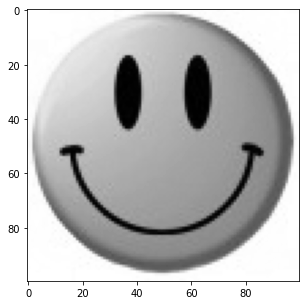

Binaire:  0000000000000000000000000000000000010110110010100101110001001011101111110101010111110011
Arythmethic image delta time:  0:00:58.604618
Predictive image delta time:  0:00:00.018220


In [20]:
hypothèse1_image()

In [21]:
hypothèse1_text()

Length of message:  500
Number of different characters:  5
Binaire:  10000011010010010100100010100110101110011000111110111
Arythmethic text delta time:  0:00:00.003189
Predictive text delta time:  0:00:00.000610
Length of message:  500
Number of different characters:  26
Binaire:  0011011111101000011000001100000100100110111101110101011
Arythmethic text delta time:  0:00:00.012868
Predictive text delta time:  0:00:00.000335
Length of message:  5000
Number of different characters:  5
Binaire:  011000111111111100001010100000110111100011100011101001
Arythmethic text delta time:  0:00:00.027494
Predictive text delta time:  0:00:00.003151
Length of message:  5000
Number of different characters:  26
Binaire:  011101110001100111000111001101100100010000100110101011
Arythmethic text delta time:  0:00:00.085520
Predictive text delta time:  0:00:00.003114


Image: 


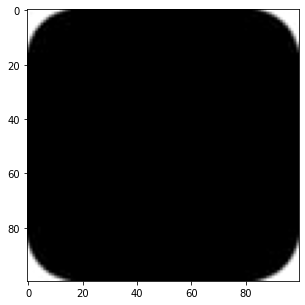

Binaire:  11111010010011101001000001010001111100000100111001
Arith
Number of characters of encoding:  50
Predictive
Number of characters of encoding:  10000


In [22]:
hypothèse2_image()

In [23]:
hypothèse2_text()

Number of different characters:  2
Length of initial msg:  5000
Binaire:  1010100110011111010110111001011000111001111010100101
Arith
Number of characters of encoding:  52
Predictive
Number of characters of encoding:  5000


Image: 


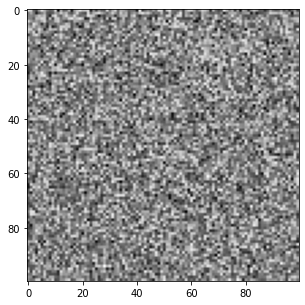

Binaire:  0001001001110101100111100110101011001111101000001111
Arith
Number of characters of encoding:  52
Predictive
Number of characters of encoding:  10000


In [24]:
hypothèse3_image()

In [25]:
hypothèse3_text()

Number of different characters:  52
Length of initial msg:  5000
Binaire:  010110100011011100000001010101101010000100010010000001
Arith
Number of characters of encoding:  54
Predictive
Number of characters of encoding:  5000
